# Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import datetime as dt
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/data.csv")

In [3]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [4]:
df['Total_price'] = df['Quantity'] * df['UnitPrice']

In [5]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  Total_price  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom        15.30  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom        22.00  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
...                 ...        ...         ...             ...          ...  
541904  12/9/2011 12:50       0.85     12680.0          France        10.20  
541905  12/9/2011 12:50       2.10     12680.0          France        12.60  
541906  12/9/2011 12:50       4.15     12680.0          France        16.60  
541907  12/9/2011 12:50       4.15     12680.0          France        16.60  
541908  12/9/2011 12:50       4.95     12680.0          France        14.85  

[541909 rows x 9 columns]

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total_price         0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total_price    0
dtype: int64

In [9]:
df = df[df['Quantity']>0]

In [10]:
df.shape

(397924, 9)

In [11]:
df = df[df['StockCode'] != 'POST']
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  Total_price  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom        15.30  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom        22.00  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
...                 ...        ...         ...             ...          ...  
541904  12/9/2011 12:50       0.85     12680.0          France        10.20  
541905  12/9/2011 12:50       2.10     12680.0          France        12.60  
541906  12/9/2011 12:50       4.15     12680.0          France        16.60  
541907  12/9/2011 12:50       4.15     12680.0          France        16.60  
541908  12/9/2011 12:50       4.95     12680.0          France        14.85  

[396825 rows x 9 columns]

In [12]:
df[df['StockCode'] == "M"]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
2239      536569         M      Manual         1  12/1/2010 15:35       1.25   
2250      536569         M      Manual         1  12/1/2010 15:35      18.95   
6798      536981         M      Manual         2  12/3/2010 14:26       0.85   
7976      537077         M      Manual        12  12/5/2010 11:59       0.42   
8530      537137         M      Manual        36  12/5/2010 12:43       0.85   
...          ...       ...         ...       ...              ...        ...   
526015    580645         M      Manual         1  12/5/2011 13:11     219.50   
526018    580646         M      Manual       800  12/5/2011 13:13       0.25   
530876    580884         M      Manual         1  12/6/2011 12:21       0.85   
531432    580956         M      Manual         4  12/6/2011 14:23       1.25   
538321    581405         M      Manual         3  12/8/2011 13:50       0.42   

        CustomerID         Country  Total_price  
2239       16274.0  United Kingdom         1.25  
2250       16274.0  United Kingdom        18.95  
6798       14723.0  United Kingdom         1.70  
7976       17062.0  United Kingdom         5.04  
8530       16327.0  United Kingdom        30.60  
...            ...             ...          ...  
526015     17857.0  United Kingdom       219.50  
526018     17857.0  United Kingdom       200.00  
530876     15907.0  United Kingdom         0.85  
531432     17841.0  United Kingdom         5.00  
538321     13521.0  United Kingdom         1.26  

[290 rows x 9 columns]

In [13]:
df_next = df

In [14]:
df1 = df.groupby(['CustomerID'])['InvoiceNo'].aggregate('count')

In [15]:
df2 = df[['Country','CustomerID']].drop_duplicates()

In [16]:
df3 = df2.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

In [17]:
df3

Country  CustomerID
35        United Kingdom        3921
14               Germany          94
13                France          87
30                 Spain          30
3                Belgium          25
32           Switzerland          21
26              Portugal          19
18                 Italy          14
12               Finland          12
1                Austria          11
24                Norway          10
23           Netherlands           9
0              Australia           9
9                Denmark           9
6        Channel Islands           9
7                 Cyprus           8
31                Sweden           8
19                 Japan           8
25                Poland           6
33                   USA           4
5                 Canada           4
36           Unspecified           4
15                Greece           4
10                  EIRE           3
17                Israel           3
22                 Malta           2
34  United Arab Emirates           2
2                Bahrain           2
8         Czech Republic           1
21             Lithuania           1
20               Lebanon           1
27                   RSA           1
28          Saudi Arabia           1
29             Singapore           1
16               Iceland           1
4                 Brazil           1
11    European Community           1

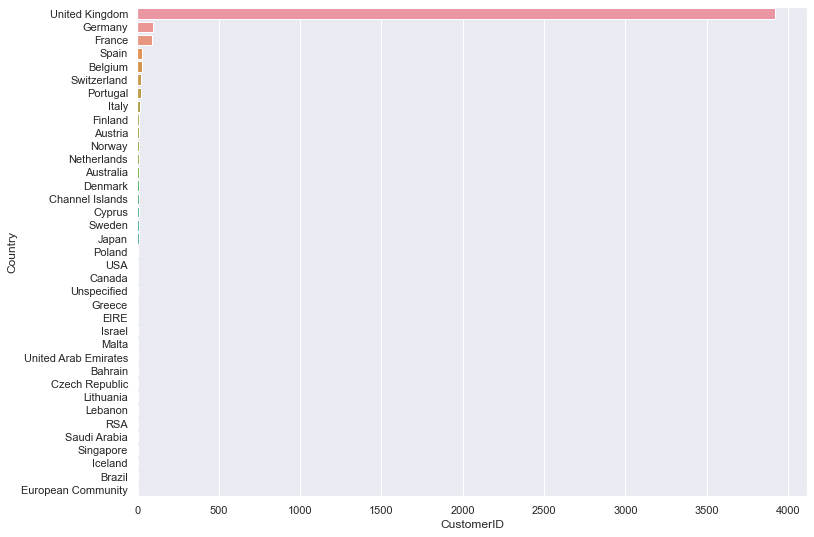

In [18]:
plt.figure(figsize=(12, 9))
sns.set_theme(style="darkgrid")
sns.barplot(x='CustomerID',y='Country',data = df3)

In [19]:
df1[17850.0]

297

In [20]:
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [21]:
date = dt.datetime(2011,12,11)

In [22]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')

In [23]:
RFMScore = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (date - x.max()).days ,'InvoiceNo' : lambda x : len(x) , 'Total_price' : lambda x : sum(x)})
RFMScore.rename(columns = {'InvoiceDate' : 'Recency' , 'InvoiceNo' : 'Frequency','Total_price' : 'Monetary'},inplace = True)
RFMScore = RFMScore.sort_values('Recency')
RFMScore = RFMScore.reset_index()

In [24]:
RFMScore

CustomerID  Recency  Frequency   Monetary
0        15694.0        1         77    6464.40
1        18102.0        1        431  259657.30
2        16705.0        1        270   14034.99
3        17754.0        1         92    1772.26
4        16626.0        1        179    4413.10
...          ...      ...        ...        ...
4334     14237.0      374          9     161.00
4335     13065.0      374         14     205.86
4336     16274.0      374         67     357.95
4337     12791.0      374          1     177.60
4338     13747.0      374          1      79.60

[4339 rows x 4 columns]

In [25]:
r = RFMScore.Recency.describe()
r

count    4339.000000
mean       93.071676
std       100.010337
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: Recency, dtype: float64

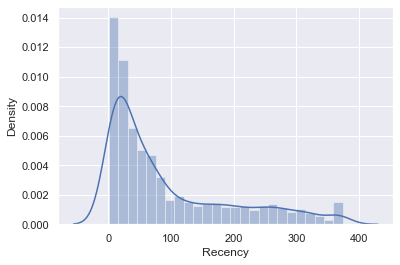

In [26]:
sns.distplot(RFMScore['Recency'])

In [27]:
f = RFMScore.Frequency.describe()
f

count    4339.000000
mean       91.455404
std       228.676890
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

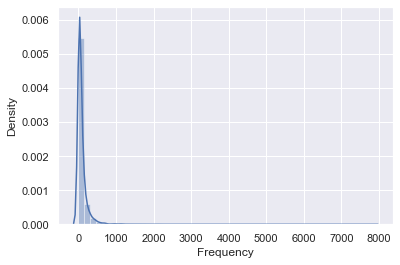

In [28]:
sns.distplot(RFMScore['Frequency'])

In [29]:
m = RFMScore.Monetary.describe()
m

count      4339.000000
mean       2035.861706
std        8959.045287
min           0.000000
25%         305.955000
50%         668.110000
75%        1643.620000
max      279138.020000
Name: Monetary, dtype: float64

In [30]:
sns.distplot(RFMScore['Monetary'])

In [31]:
RFMScore['R_Rank'] = 0
RFMScore.loc[RFMScore.Recency <= r['25%'], 'R_Rank'] = 1
RFMScore.loc[(RFMScore.Recency <= r['50%']) & (RFMScore.Recency > r['25%']), 'R_Rank'] = 2
RFMScore.loc[(RFMScore.Recency <= r['75%']) & (RFMScore.Recency > r['50%']), 'R_Rank'] = 3
RFMScore.loc[RFMScore.Recency > r['75%'], 'R_Rank'] = 4

In [32]:
RFMScore['F_Rank'] = 0
RFMScore.loc[RFMScore.Frequency <= f['25%'], 'F_Rank'] = 4
RFMScore.loc[(RFMScore.Frequency <= f['50%']) & (RFMScore.Frequency > r['25%']), 'F_Rank'] = 3
RFMScore.loc[(RFMScore.Frequency <= f['75%']) & (RFMScore.Frequency > r['50%']), 'F_Rank'] = 2
RFMScore.loc[RFMScore.Frequency > f['75%'], 'F_Rank'] = 1

In [33]:
RFMScore['M_Rank'] = 0
RFMScore.loc[RFMScore.Monetary <= m['25%'], 'M_Rank'] = 4
RFMScore.loc[(RFMScore.Monetary <= m['50%']) & (RFMScore.Monetary > m['25%']), 'M_Rank'] = 3
RFMScore.loc[(RFMScore.Monetary <= m['75%']) & (RFMScore.Monetary > m['50%']), 'M_Rank'] = 2
RFMScore.loc[RFMScore.Monetary > m['75%'], 'M_Rank'] = 1

In [34]:
RFMScore['RFMGroup'] = RFMScore.R_Rank.map(str)+RFMScore.F_Rank.map(str)+RFMScore.M_Rank.map(str)
RFMScore['RFM'] = RFMScore.iloc[: , 4:].sum(axis=1)

In [35]:
RFMScore

CustomerID  Recency  Frequency   Monetary  R_Rank  F_Rank  M_Rank  \
0        15694.0        1         77    6464.40       1       2       1   
1        18102.0        1        431  259657.30       1       1       1   
2        16705.0        1        270   14034.99       1       1       1   
3        17754.0        1         92    1772.26       1       2       1   
4        16626.0        1        179    4413.10       1       1       1   
...          ...      ...        ...        ...     ...     ...     ...   
4334     14237.0      374          9     161.00       4       4       4   
4335     13065.0      374         14     205.86       4       4       4   
4336     16274.0      374         67     357.95       4       2       3   
4337     12791.0      374          1     177.60       4       4       4   
4338     13747.0      374          1      79.60       4       4       4   

     RFMGroup  RFM  
0         121    4  
1         111    3  
2         111    3  
3         121    4  
4         111    3  
...       ...  ...  
4334      444   12  
4335      444   12  
4336      423    9  
4337      444   12  
4338      444   12  

[4339 rows x 9 columns]

In [36]:
Loyalty_Level = ['Platinum','Gold','Silver','Bronze']
RFM_cuts = pd.qcut(RFMScore['RFM'],q=4,labels=Loyalty_Level)
RFMScore['Loyalty'] = RFM_cuts.values

In [37]:
RFMScore

CustomerID  Recency  Frequency   Monetary  R_Rank  F_Rank  M_Rank  \
0        15694.0        1         77    6464.40       1       2       1   
1        18102.0        1        431  259657.30       1       1       1   
2        16705.0        1        270   14034.99       1       1       1   
3        17754.0        1         92    1772.26       1       2       1   
4        16626.0        1        179    4413.10       1       1       1   
...          ...      ...        ...        ...     ...     ...     ...   
4334     14237.0      374          9     161.00       4       4       4   
4335     13065.0      374         14     205.86       4       4       4   
4336     16274.0      374         67     357.95       4       2       3   
4337     12791.0      374          1     177.60       4       4       4   
4338     13747.0      374          1      79.60       4       4       4   

     RFMGroup  RFM   Loyalty  
0         121    4  Platinum  
1         111    3  Platinum  
2         111    3  Platinum  
3         121    4  Platinum  
4         111    3  Platinum  
...       ...  ...       ...  
4334      444   12    Bronze  
4335      444   12    Bronze  
4336      423    9    Silver  
4337      444   12    Bronze  
4338      444   12    Bronze  

[4339 rows x 10 columns]

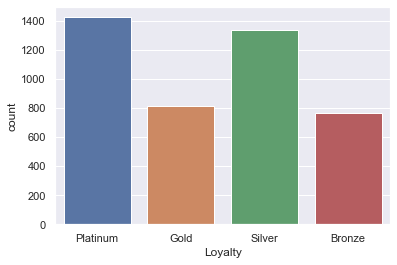

In [38]:
sns.countplot('Loyalty',data=RFMScore)

In [39]:
df_plat = RFMScore[RFMScore['Loyalty'] == 'Platinum']
df_gold = RFMScore[RFMScore['Loyalty'] == 'Gold']
df_silver = RFMScore[RFMScore['Loyalty'] == 'Silver']
df_bronze = RFMScore[RFMScore['Loyalty'] == 'Bronze']

In [40]:
#recency vs frequency
plt.figure(figsize=(20,8))
x_plat = df_plat['Recency']
y_plat = df_plat['Frequency']
x_gold = df_gold['Recency']
y_gold = df_gold['Frequency']
x_silver = df_gold['Recency']
y_silver = df_gold['Frequency']
x_bronze = df_gold['Recency']
y_bronze = df_gold['Frequency']
plt.scatter(x_plat,y_plat,label="Platinum")
plt.scatter(x_gold,y_gold,color="r" ,label = "Gold")
plt.scatter(x_silver,y_silver,color="g" ,label = "Silver")
plt.scatter(x_bronze,y_bronze,color="orange" , label = "Bronze")
plt.xlabel('Recency')
plt.ylabel('Frequnecy')
plt.title('Visualization')
plt.legend()

In [41]:
plt.figure(figsize=(20,8))
x_plat = df_plat['Frequency']
y_plat = df_plat['Monetary']
x_gold = df_gold['Frequency']
y_gold = df_gold['Monetary']
x_silver = df_gold['Frequency']
y_silver = df_gold['Monetary']
x_bronze = df_gold['Frequency']
y_bronze = df_gold['Monetary']
plt.scatter(x_plat,y_plat,label="Platinum")
plt.scatter(x_gold,y_gold,color="r" ,label = "Gold")
plt.scatter(x_silver,y_silver,color="g" ,label = "Silver")
plt.scatter(x_bronze,y_bronze,color="orange" , label = "Bronze")
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Visualization')
plt.legend()

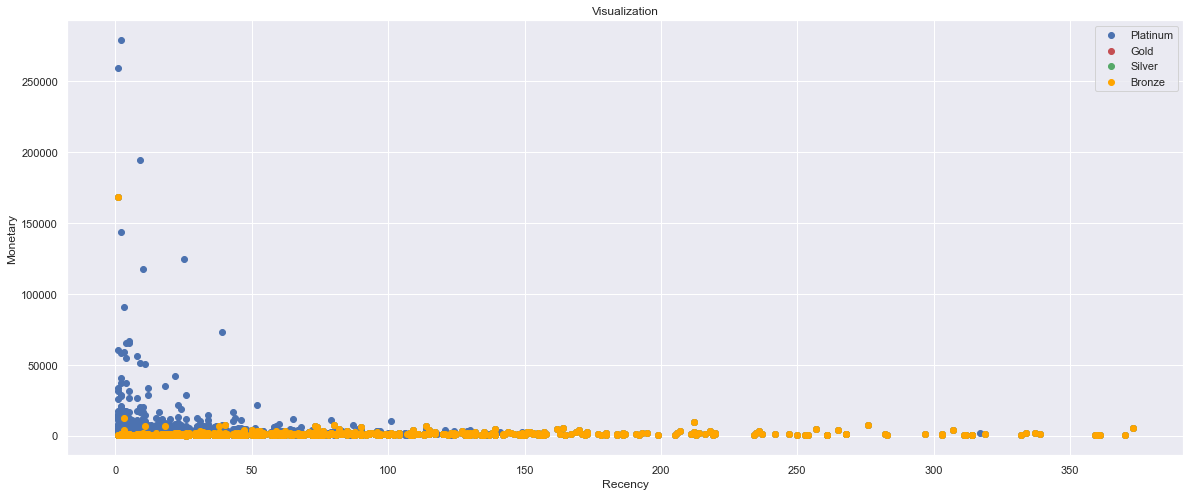

In [42]:
plt.figure(figsize=(20,8))
x_plat = df_plat['Recency']
y_plat = df_plat['Monetary']
x_gold = df_gold['Recency']
y_gold = df_gold['Monetary']
x_silver = df_gold['Recency']
y_silver = df_gold['Monetary']
x_bronze = df_gold['Recency']
y_bronze = df_gold['Monetary']
plt.scatter(x_plat,y_plat,color="b",label="Platinum")
plt.scatter(x_gold,y_gold,color="r" ,label = "Gold")
plt.scatter(x_silver,y_silver,color="g" ,label = "Silver")
plt.scatter(x_bronze,y_bronze,color="orange" , label = "Bronze")
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Visualization')
plt.legend()

In [43]:
def CheckNegandzero(num):
    if num <= 0:
        return 1
    else:
        return num
RFMScore['Recency'] = RFMScore['Recency'].apply(CheckNegandzero)
RFMScore['Monetary'] = RFMScore['Monetary'].apply(CheckNegandzero)


In [44]:
Log_transformed_data = RFMScore.iloc[:,1:4].apply(np.log,axis=1).round(3)
Log_transformed_data

Recency  Frequency  Monetary
0       0.000      4.344     8.774
1       0.000      6.066    12.467
2       0.000      5.598     9.549
3       0.000      4.522     7.480
4       0.000      5.187     8.392
...       ...        ...       ...
4334    5.924      2.197     5.081
4335    5.924      2.639     5.327
4336    5.924      4.205     5.880
4337    5.924      0.000     5.180
4338    5.924      0.000     4.377

[4339 rows x 3 columns]

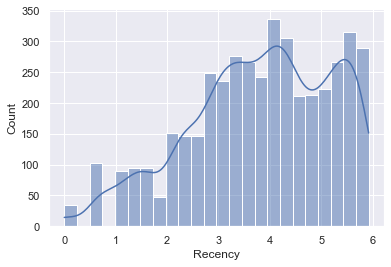

In [45]:
sns.histplot(data=Log_transformed_data,x="Recency",kde=True)

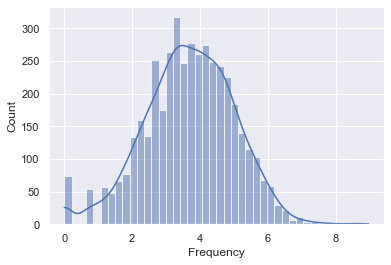

In [46]:
sns.histplot(data=Log_transformed_data,x="Frequency",kde=True)

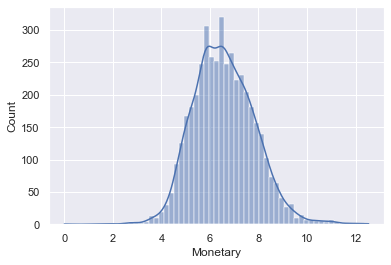

In [47]:
sns.histplot(data=Log_transformed_data,x="Monetary",kde=True)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Log_transformed_data)
scaled_data

array([[-2.74761194,  0.5040848 ,  1.73693172],
       [-2.74761194,  1.79926323,  4.65966744],
       [-2.74761194,  1.44726352,  2.35028676],
       ...,
       [ 1.53442157,  0.39953787, -0.55345474],
       [ 1.53442157, -2.7631946 , -1.10745285],
       [ 1.53442157, -2.7631946 , -1.74296782]])

In [49]:
scaled_data = pd.DataFrame(scaled_data,index = RFMScore.index , columns = Log_transformed_data.columns)

In [50]:
scaled_data

Recency  Frequency  Monetary
0    -2.747612   0.504085  1.736932
1    -2.747612   1.799263  4.659667
2    -2.747612   1.447264  2.350287
3    -2.747612   0.637965  0.712827
4    -2.747612   1.138136  1.434607
...        ...        ...       ...
4334  1.534422  -1.110751 -1.185804
4335  1.534422  -0.778307 -0.991113
4336  1.534422   0.399538 -0.553455
4337  1.534422  -2.763195 -1.107453
4338  1.534422  -2.763195 -1.742968

[4339 rows x 3 columns]

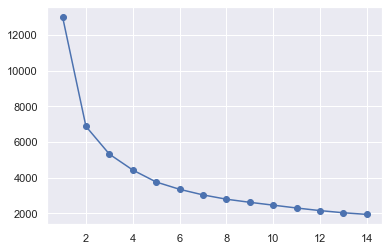

In [51]:
sum_of_squares = {}
for k in range(1,15):
    km = KMeans(n_clusters=k , random_state=0).fit(scaled_data)
    sum_of_squares[k] = km.inertia_
    
x = list(sum_of_squares.keys())
y = list(sum_of_squares.values())
plt.scatter(x,y)
plt.plot(x,y)

In [52]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
RFMScore['Clusters'] = kmeans.labels_
RFMScore

CustomerID  Recency  Frequency   Monetary  R_Rank  F_Rank  M_Rank  \
0        15694.0        1         77    6464.40       1       2       1   
1        18102.0        1        431  259657.30       1       1       1   
2        16705.0        1        270   14034.99       1       1       1   
3        17754.0        1         92    1772.26       1       2       1   
4        16626.0        1        179    4413.10       1       1       1   
...          ...      ...        ...        ...     ...     ...     ...   
4334     14237.0      374          9     161.00       4       4       4   
4335     13065.0      374         14     205.86       4       4       4   
4336     16274.0      374         67     357.95       4       2       3   
4337     12791.0      374          1     177.60       4       4       4   
4338     13747.0      374          1      79.60       4       4       4   

     RFMGroup  RFM   Loyalty  Clusters  
0         121    4  Platinum         2  
1         111    3  Platinum         2  
2         111    3  Platinum         2  
3         121    4  Platinum         2  
4         111    3  Platinum         2  
...       ...  ...       ...       ...  
4334      444   12    Bronze         1  
4335      444   12    Bronze         1  
4336      423    9    Silver         1  
4337      444   12    Bronze         1  
4338      444   12    Bronze         1  

[4339 rows x 11 columns]

Text(0, 0.5, 'Frequnecy')

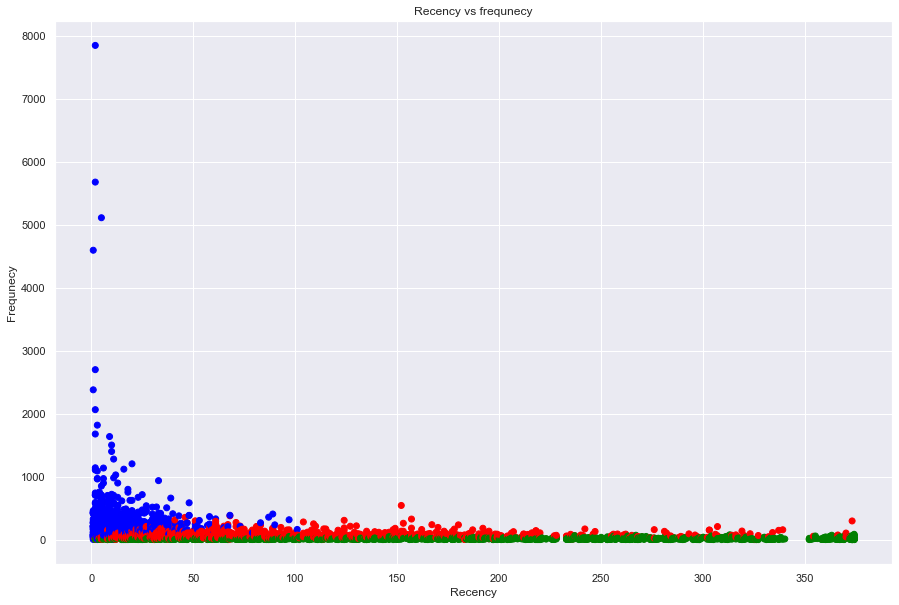

In [53]:
plt.figure(figsize=(15,10))
colors = ["red","green","blue"]
RFMScore['Color'] = RFMScore['Clusters'].map(lambda c: colors[c])
x = RFMScore['Recency']
y = RFMScore['Frequency']
plt.scatter(x,y,c=RFMScore['Color'])
plt.title('Recency vs frequnecy')
plt.xlabel('Recency')
plt.ylabel('Frequnecy')

In [54]:
RFMScore

CustomerID  Recency  Frequency   Monetary  R_Rank  F_Rank  M_Rank  \
0        15694.0        1         77    6464.40       1       2       1   
1        18102.0        1        431  259657.30       1       1       1   
2        16705.0        1        270   14034.99       1       1       1   
3        17754.0        1         92    1772.26       1       2       1   
4        16626.0        1        179    4413.10       1       1       1   
...          ...      ...        ...        ...     ...     ...     ...   
4334     14237.0      374          9     161.00       4       4       4   
4335     13065.0      374         14     205.86       4       4       4   
4336     16274.0      374         67     357.95       4       2       3   
4337     12791.0      374          1     177.60       4       4       4   
4338     13747.0      374          1      79.60       4       4       4   

     RFMGroup  RFM   Loyalty  Clusters  Color  
0         121    4  Platinum         2   blue  
1         111    3  Platinum         2   blue  
2         111    3  Platinum         2   blue  
3         121    4  Platinum         2   blue  
4         111    3  Platinum         2   blue  
...       ...  ...       ...       ...    ...  
4334      444   12    Bronze         1  green  
4335      444   12    Bronze         1  green  
4336      423    9    Silver         1  green  
4337      444   12    Bronze         1  green  
4338      444   12    Bronze         1  green  

[4339 rows x 12 columns]

In [55]:
RFMScore[RFMScore['Clusters'] == 0]

CustomerID  Recency  Frequency  Monetary  R_Rank  F_Rank  M_Rank  \
35       13954.0        2         25    439.92       1       3       3   
52       15520.0        2         18    343.50       1       0       3   
93       13404.0        2         11    252.49       1       4       4   
99       16322.0        2         37    326.75       1       3       3   
101      17830.0        2         23    398.70       1       3       3   
...          ...      ...        ...       ...     ...     ...     ...   
4276     15332.0      367         35   1661.06       4       3       1   
4296     16718.0      370         45    623.75       4       0       3   
4297     15880.0      370        105    343.28       4       1       3   
4299     13370.0      372         39    754.87       4       3       2   
4308     17850.0      373        297   5391.21       4       1       1   

     RFMGroup  RFM   Loyalty  Clusters Color  
35        133    7      Gold         0   red  
52        103    4  Platinum         0   red  
93        144    9    Silver         0   red  
99        133    7      Gold         0   red  
101       133    7      Gold         0   red  
...       ...  ...       ...       ...   ...  
4276      431    8    Silver         0   red  
4296      403    7      Gold         0   red  
4297      413    8    Silver         0   red  
4299      432    9    Silver         0   red  
4308      411    6      Gold         0   red  

[1860 rows x 12 columns]